In [1]:
import pandas as pd
data=pd.read_csv("Feature.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'len_Q1', 'len_Q2', 'w_common', 'word_total',
       'w_share', 'total_freq', 'dif_freq', 'cwcmin', 'cwcmax', 'cscmin',
       'cscmax', 'ctcmin', 'ctcmax', 'last', 'first', 'diff', 'mean',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [4]:
result=data["is_duplicate"]

In [5]:
data=data.drop("is_duplicate",axis=1)

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(data,result,test_size=0.30,stratify=result)

In [7]:
print("Train data size", X_train.shape)
print("Test data size", X_test.shape)
print("YTrain data size", Y_train.shape)
print("YTest data size", Y_test.shape)



Train data size (283003, 29)
Test data size (121287, 29)
YTrain data size (283003,)
YTest data size (121287,)


In [8]:
X_train.head(2)

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,len_Q1,len_Q2,w_common,...,ctcmax,last,first,diff,mean,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
153318,153318,240683,114572,How do you determine the Lewis dot structure o...,How is the Lewis dot structure determined?,3,2,10,7,5,...,0.714276,0,1,3,8.5,83,83,65,68,0.581395
191815,191815,291275,291276,Who is the best CNN news anchor?,Who is the best anchor on WGOG News? Why?,1,1,7,9,4,...,0.571420,0,1,2,8.0,93,77,70,69,0.484848


In [9]:
#implimenting Avg-Word2Vec
import pickle
with open("glove_vectors","rb") as f:
    model=pickle.load(f)
    glove_words=set(model.keys())

In [10]:
tf_idf=TfidfVectorizer()
tf_idf.fit(X_train["question1"])
dic=dict(zip(tf_idf.get_feature_names(),list(tf_idf.idf_)))
tfidf_words=set(tf_idf.get_feature_names())

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
import numpy as np

In [12]:
from tqdm import tqdm
X_trainw2v1=[]
for sentence in tqdm(X_train["question1"]):
    vector=np.zeros(300)
    weight=0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec=model[word]
            tfidf=dic[word]+(sentence.count(word)/len(sentence.split()))
            vector+=(vec*tfidf)
            weight+=tfidf
    if weight !=0:
        vector/=weight
    X_trainw2v1.append(vector)

100%|███████████████████████████████████████████████████████████████████████| 283003/283003 [00:09<00:00, 30868.76it/s]


In [13]:
X_testw2v1=[]
for sentence in tqdm(X_test["question1"]):
    vec=np.zeros(300)
    weight=0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec=model[word]
            tfidf=dic[word]+(sentence.count(word)/len(sentence.split()))
            vector+=(vec*tfidf)
    if weight !=0:
        vector/=weight
    X_testw2v1.append(vector)
    

100%|███████████████████████████████████████████████████████████████████████| 121287/121287 [00:03<00:00, 34973.58it/s]


In [14]:
print(len(X_testw2v1))

121287


In [15]:
tf_idf2=TfidfVectorizer()
tf_idf2.fit(X_train["question2"])
dic=dict(zip(tf_idf2.get_feature_names(),list(tf_idf2.idf_)))
tfidf2_words=set(tf_idf2.get_feature_names())

In [16]:
from tqdm import tqdm
X_trainw2v2=[]
for sentence in tqdm(X_train["question2"]):
    vector=np.zeros(300)
    weight=0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf2_words):
            vec=model[word]
            tfidf=dic[word]+(sentence.count(word)/len(sentence.split()))
            vector+=(vec*tfidf)
            weight+=tfidf
    if weight !=0:
        vector/=weight
    X_trainw2v2.append(vector)

100%|███████████████████████████████████████████████████████████████████████| 283003/283003 [00:09<00:00, 29812.15it/s]


In [17]:
X_testw2v2=[]
for sentence in tqdm(X_test["question2"]):
    vec=np.zeros(300)
    weight=0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf2_words):
            vec=model[word]
            tfidf=dic[word]+(sentence.count(word)/len(sentence.split()))
            vector+=(vec*tfidf)
    if weight !=0:
        vector/=weight
    X_testw2v2.append(vector)
    

100%|███████████████████████████████████████████████████████████████████████| 121287/121287 [00:03<00:00, 33294.73it/s]


In [18]:
from scipy.sparse import hstack
from scipy import sparse


In [38]:
X_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'freq_qid1',
       'freq_qid2', 'len_Q1', 'len_Q2', 'w_common', 'word_total', 'w_share',
       'total_freq', 'dif_freq', 'cwcmin', 'cwcmax', 'cscmin', 'cscmax',
       'ctcmin', 'ctcmax', 'last', 'first', 'diff', 'mean', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio'],
      dtype='object')

In [19]:
X_train=X_train.drop("question1",axis=1)
X_train=X_train.drop("question2",axis=1)


In [20]:
word_total=np.array(X_train)
word_total = sparse.csr_matrix(word_total)


In [21]:
train=hstack((word_total,X_trainw2v1,X_trainw2v2))

In [22]:
train.shape

(283003, 627)

In [23]:
X_test=X_test.drop("question1",axis=1)
X_test=X_test.drop("question2",axis=1)


In [24]:
word_test=np.array(X_test)
word_test = sparse.csr_matrix(word_test)

In [25]:
test=hstack((word_test,X_testw2v1,X_testw2v2))

In [26]:
test.shape

(121287, 627)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [27]:
from xgboost import XGBClassifier


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


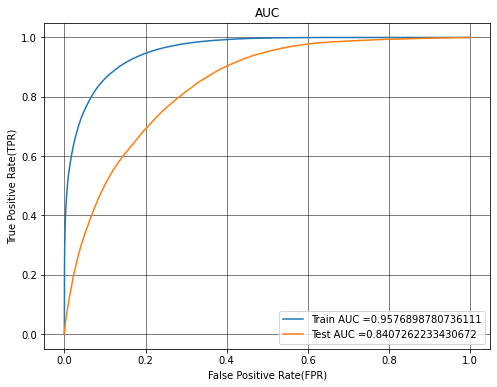

In [30]:
model_set=XGBClassifier()
model_set.fit(train,Y_train)
y_train_probs = model_set.predict_proba(train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_probs)

plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)